In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Crear los datos
x = np.array([10,20,15,12,30])
y = np.array([30,50,40,34,70])

datos = np.array([x,y])
datos

array([[10, 20, 15, 12, 30],
       [30, 50, 40, 34, 70]])

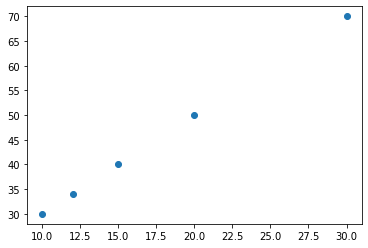

In [ ]:
#Graficar los datos
plt.scatter(x,y)

In [ ]:
# Obtener el numero de muestras en los datos
m = float(len(x))
m

5.0

In [ ]:
#Calcular la hipótesis aplicando vectorización
#Vectorización es la aplicación del çalgebra lineal a ML
t0 = 0.5
t1 = 0.5
hyp = t0 + t1*x
hyp

array([ 5.5, 10.5,  8. ,  6.5, 15.5])

In [ ]:
datos.shape[1]

5

In [ ]:
#Definir una función para calcular el costo
def calcular_costo(t0, t1, data):
  m = float(data.shape[1]) #Devuelve la cantidad de columnas de la data, si se usa únicamente len(data), mostrará la cantidad de vectores y no los datos
  x= data[0]
  y=data[1]

  J=0

  for i in range(0,data.shape[1]):  #Recorre la matriz da datos
    x = data[0,i]
    y = data[1,i]

    J += (1/(2*m)) * (t0 + t1*x - y)**2

  return J

In [ ]:
calcular_costo(3, 0.5, datos)

605.2250000000001

In [ ]:
calcular_costo(5,1,datos)

276.4

In [ ]:
calcular_costo(8,1.5,datos)

63.625

In [ ]:
#Calcular hipótesis
hyp1 = 3 + 0.5*x
hyp2 = 5 + 1*x
hyp3 = 8 + 1.5*x
hyp4 = 10 + 2*x

In [ ]:
print(hyp1)
print(hyp2)
print(hyp3)
print(hyp4)

[ 8.  13.  10.5  9.  18. ]
[15 25 20 17 35]
[23.  38.  30.5 26.  53. ]
[30 50 40 34 70]


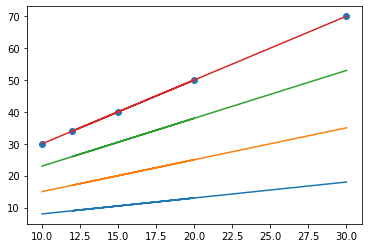

In [ ]:
#Graficar las hipótesis
plt.scatter(x,y)
plt.plot(x,hyp1)
plt.plot(x,hyp2)
plt.plot(x,hyp3)
plt.plot(x,hyp4)

In [ ]:
#Variar t1 en el rango de -2 a 12 manteniendo t0=10
#Calcular los costos para todos los valores de t1
costos=[]

for i in range (-2,12):
  costos.append(calcular_costo(10,i,datos))

#Convertir en np array
costos = np.array(costos)
print(costos)

[ 2830.4  1592.1   707.6   176.9     0.    176.9   707.6  1592.1  2830.4
  4422.5  6368.4  8668.1 11321.6 14328.9]


Text(0, 0.5, 'Costo')

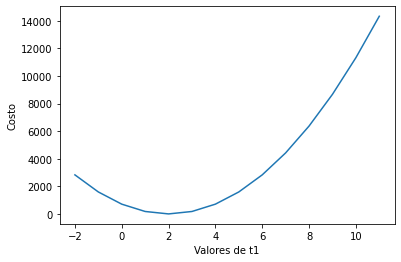

In [ ]:
#Graficar costos
plt.plot(range(-2,12), costos)
plt.xlabel('Valores de t1')
plt.ylabel('Costo')

##Probar las thetas para un nuevo ejemplo

In [ ]:
theta_optimo = np.array([10,2])

In [ ]:
x=25
pred = theta_optimo[0] + theta_optimo[1]*x
pred


60

##Gradient Descent


In [ ]:
#Un algoritmo que calcule los valores y actualice theta
def paso_gradiente(t0_actual, t1_actual, data, alpha):
  t0_grad = 0
  t1_grad = 0
  m = float(data.shape[1]) #cantidad de muestras

  for i in range(0, int(m)):
    x = data[0,i]
    y = data[1,i]

    hyp = t0_actual + t1_actual*x

    t0_grad += -(1/m) * (hyp-y)
    t1_grad += -(1/m) * (hyp-y)*x
#Actualizar t0 y t1
  t0_actual = t0_actual + alpha*t0_grad
  t1_actual = t1_actual + alpha*t1_grad
  return t0_actual, t1_actual

In [ ]:
def gradient_descent(t0_inicial, t1_inicial, data, learning_rate, num_iter):
  #Valores iniciales
  t0 = t0_inicial
  t1 = t1_inicial

  historial_costos = []

  for i in range(0, num_iter):
    historial_costos.append(calcular_costo(t0,t1,data))
    t0,t1 = paso_gradiente(t0, t1, data, learning_rate)

  return [t0,t1,historial_costos]

##Ejemplo 1 cuaderno


In [ ]:
#Cargar datos
datos = np.array([[2,4],[3,5]])

#Definir los hiperparametros
alpha = 0.05
num_iter = 30
t0_inicial = 0.5
t1_inicial = 0.5

In [ ]:
[t0, t1,costos] = gradient_descent(t0_inicial, t1_inicial, datos, alpha, num_iter )

In [ ]:
print(t0)

0.7217770225874036


In [ ]:
print(t1)

1.0842391393829391


In [ ]:
print(costos)

[2.125, 0.44312500000000005, 0.09553515625000011, 0.023670736328125122, 0.008784286416015646, 0.005672451777893089, 0.0049941234585576385, 0.004818992887275552, 0.004748165991101193, 0.004699209861968468, 0.004655087146991828, 0.004612274269223027, 0.004570040249753325, 0.004528231215742003, 0.004486812576962507, 0.00444577441804431, 0.004405111947896403, 0.00436482145942127, 0.004324899494375488, 0.004285342670564013, 0.0042461476459052004, 0.0042073111107818004, 0.004168829786239319, 0.004130700423394605, 0.004092919803096365, 0.0040554847356401745, 0.0040183920604963605, 0.0039816386460424825, 0.0039452213892988705, 0.003909137215666669]


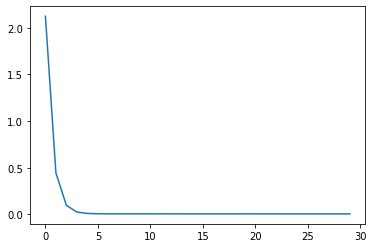

In [ ]:
plt.plot(range(0,num_iter),costos)

#Nuevo ejemplo de las diapositivas


In [ ]:
x = np.array([500,620,1020,740,560,480,820,880,1040,1120])
y = np.array([305, 392,578,451,368,271,457,529,681,701])
datos = np.array([x,y])

In [ ]:
#Defino los hiperparámetros
alpha = 0.000001
num_iter = 30
t0_inicial = 0  #Para ejemplos reales, las thetas siempre deben ser 0 porque es el peor caso posible, en el que el costo es el más alto
t1_inicial = 0

In [ ]:
[t0, t1,costos] = gradient_descent(t0_inicial, t1_inicial, datos, alpha, num_iter )

In [ ]:
t0,t1, costos

(0.0007078559336972663,
 0.6090231611028674,
 [121844.55000000002,
  14849.482306247462,
  2108.5558083153837,
  591.3717778060864,
  410.706157806863,
  389.1925734871024,
  386.6307449095243,
  386.3256832289448,
  386.28935637677176,
  386.2850303520198,
  386.2845149719903,
  386.2844533618896,
  386.2844457865175,
  386.284444645577,
  386.2844442708459,
  386.28444398735434,
  386.2844437147278,
  386.2844434433948,
  386.28444317221613,
  386.28444290105597,
  386.28444262989865,
  386.284442358741,
  386.2844420875835,
  386.28444181642544,
  386.2844415452681,
  386.28444127411086,
  386.28444100295303,
  386.2844407317958,
  386.2844404606387,
  386.2844401894816])

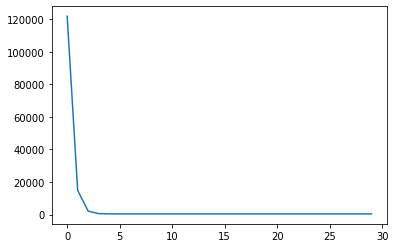

In [ ]:
#Graficar
plt.plot(range(0,num_iter),costos)

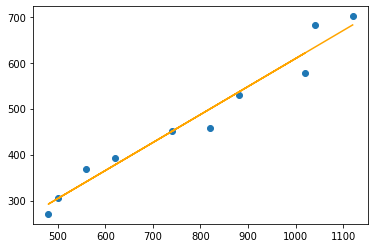

In [ ]:
#Código para visualizar las hipótesis
hyp = t0+t1*x
plt.scatter(x,y)
plt.plot(x,hyp,'orange')